# Datasets Guide


- The `DatasetLoader` class provides a simple interface to access example multi-omics datasets included in this package.  
- Each dataset is loaded as a collection of **pandas DataFrames**, with table names as keys and the corresponding data as values.  
- Users can explore the structure of any dataset via the `.shape` property, which returns a mapping from table name to `(rows, columns)`.  
- Three datasets are available out-of-the-box:

    1. **Example1**:
        - Synthetic dataset designed for testing and demonstration  
        - Contains small DataFrames: `X1`, `X2`, `Y`, `clinical_data`  
        - Useful for quick checks of package functionality

    2. **monet**:  
        - Multi-omics benchmark dataset from the **Multi-Omics NETwork Analysis Workshop (MONET)**. 
        - Includes multiple DataFrames: `gene_data`, `mirna_data`, `phenotype`, `rppa_data`, `clinical_data`  
        - Workshop details: <https://coloradosph.cuanschutz.edu/research-and-practice/centers-programs/cida/learning/multi-omics-network-analysis-workshop>

    3. **brca**  :
        - Breast cancer cohort from TCGA (BRCA project)  
        - Provides comprehensive omics DataFrames: `rna`, `mirna`, `meth`, `pam50`, `clinical`  
        - Full dataset description available at: <https://bioneuralnet.readthedocs.io/en/latest/TCGA-BRCA_Dataset.html>



In [ ]:
from bioneuralnet.datasets import DatasetLoader
import pandas as pd

for name in ["example1", "monet", "brca"]:
    ds = DatasetLoader(name)
    display(f"{name} shapes:")
    for tbl, (rows, cols) in ds.shape.items():
        display(f"  - {tbl}: {rows} x {cols}")

'example1 shapes'

'  - X1: 358 x 500'

'  - X2: 358 x 100'

'  - Y: 358 x 1'

'  - clinical_data: 358 x 6'

'monet shapes'

'  - gene_data: 107 x 5039'

'  - mirna_data: 107 x 789'

'  - phenotype: 106 x 1'

'  - rppa_data: 107 x 175'

'  - clinical_data: 107 x 5'

'brca shapes'

'  - mirna: 769 x 503'

'  - pam50: 769 x 1'

'  - clinical: 769 x 118'

'  - rna: 769 x 6000'

'  - meth: 769 x 6000'

### Example 1: Synthetic dataset

In [4]:
from bioneuralnet.datasets import DatasetLoader

Example = DatasetLoader("example1")
omics1 = Example.data["X1"]
omics2= Example.data["X2"]
phenotype = Example.data["Y"]
clinical = Example.data["clinical_data"]

display(omics1.iloc[:, :5])
display(omics2.iloc[:, :5])
display(phenotype.iloc[:, :5])
display(clinical.iloc[:, :5])

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
Samp_1,22.485701,40.353720,31.025745,20.847206,26.697293
Samp_2,37.058850,34.052233,33.487020,23.531461,26.754628
Samp_3,20.530767,31.669623,35.189567,20.952544,25.018826
Samp_4,33.186888,38.480880,18.897097,31.823300,34.049383
Samp_5,28.961981,41.060494,28.494956,18.374495,30.815238
...,...,...,...,...,...
Samp_354,24.520652,28.595409,31.299666,32.095379,33.659730
Samp_355,31.252789,28.988087,29.574195,31.189288,32.098841
Samp_356,24.894826,25.944887,30.852641,26.705158,30.102546
Samp_357,17.034337,38.574705,25.095201,37.062442,35.417758


,Mir_1,Mir_2,Mir_3,Mir_4,Mir_5
Samp_1,15.223913,17.545826,15.784719,14.891983,10.348205
Samp_2,16.306965,16.672830,13.361529,14.488549,12.660905
Samp_3,16.545119,16.735005,14.617472,17.845267,13.822790
Samp_4,13.986899,16.207432,16.293078,17.725286,12.300565
Samp_5,16.338332,17.393869,16.397925,15.853725,13.387675
...,...,...,...,...,...
Samp_354,15.065065,16.079830,14.635616,17.013845,11.612843
Samp_355,15.997576,15.448951,15.355566,16.501752,11.701778
Samp_356,15.206862,14.395378,16.218001,16.044955,13.650741
Samp_357,14.474129,15.482863,15.512549,15.136613,14.531277


,phenotype
Samp_1,235.067423
Samp_2,253.544991
Samp_3,234.204994
Samp_4,281.035429
Samp_5,245.447781
...,...
Samp_354,236.120451
Samp_355,222.572359
Samp_356,268.472285
Samp_357,235.808167


,Age,Gender,BMI,Chronic_Bronchitis,Emphysema
PatientID,,,,,
Samp_1,78,0,31.2,1,1
Samp_2,68,1,19.2,1,0
Samp_3,54,1,19.3,0,1
Samp_4,47,1,36.2,0,0
Samp_5,60,1,26.2,0,1
...,...,...,...,...,...
Samp_354,71,0,23.0,1,0
Samp_355,62,1,25.5,0,1
Samp_356,61,0,21.1,1,0


### Monet: Set from the **Multi-Omics NETwork Analysis Workshop (MONET)**, Univ. of Colorado Anschutz  

In [5]:
from bioneuralnet.datasets import DatasetLoader

monet = DatasetLoader("monet")
gene = monet.data["gene_data"]
mirna = monet.data["mirna_data"]
phenotype = monet.data["phenotype"]
rppa = monet.data["rppa_data"]
clinical = monet.data["clinical_data"]

display(gene.iloc[:, :5])
display(mirna.iloc[:, :5])
display(phenotype.iloc[:, :5])
display(rppa.iloc[:, :5])
display(clinical.iloc[:, :5])

,A2ML1,AACSL,AADAC,AADAT,AATK
0,0.466671,0.074845,0.990309,-0.410873,1.897562
1,-0.524465,-0.146727,-0.735206,-0.628456,0.170962
2,-0.029879,-0.626509,-0.735206,-0.677892,0.020060
3,0.674895,-0.626509,-0.330409,-0.662162,-0.911966
4,-0.110607,-0.626509,-0.735206,-0.848542,0.042645
...,...,...,...,...,...
102,0.999600,1.343979,-0.735206,1.742674,0.253103
103,-0.919337,-0.626509,-0.735206,-1.380461,-0.899019
104,-0.606702,-0.626509,0.497658,-0.717505,-0.625122
105,1.911346,0.021380,-0.166624,0.785542,0.344953


,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c
0,-0.832527,-0.851616,-0.837155,-1.079659,-0.181270
1,0.229155,0.249696,0.234295,0.859289,-0.057729
2,0.414268,0.417023,0.408913,0.635059,1.195203
3,-0.855214,-0.869152,-0.862713,-1.955447,-0.572552
4,1.365310,1.356252,1.351750,1.259095,-0.316760
...,...,...,...,...,...
102,-1.402001,-1.401125,-1.349961,-1.534386,1.231456
103,2.551277,2.547046,2.563191,1.054769,0.981436
104,0.182138,0.188730,0.191094,-1.060615,0.345907
105,0.289489,0.292470,0.297778,-0.197850,1.040270


,0
0,1
1,0
2,0
3,0
4,0
...,...
101,0
102,1
103,0
104,0


,YWHAE,YWHAZ,EIF4EBP1,TP53BP1,ARAF
0,-0.357998,0.099812,-1.067285,-0.412211,-0.357998
1,-0.055031,-0.517445,0.032633,-0.743096,-0.055031
2,-0.137863,-0.559690,0.302764,-0.968388,-0.137863
3,-0.170726,-0.028206,-0.341461,0.282581,-0.170726
4,-1.430765,-0.138087,-0.545894,-0.616864,-1.430765
...,...,...,...,...,...
102,-0.708685,-0.778813,1.623365,-0.090612,-0.708685
103,0.261442,-0.407563,-0.567735,-0.186919,0.261442
104,1.350866,1.461061,-1.159541,-1.674874,1.350866
105,0.179510,-0.300029,-1.048938,-0.621680,0.179510


,overall_survival,status,years_to_birth,race,radiation_therapy
0,3015,0,37,blackorafricanamerican,yes
1,2348,1,73,white,yes
2,3011,0,41,asian,yes
3,3283,0,67,white,no
4,1873,0,42,white,no
...,...,...,...,...,...
102,2329,0,63,white,yes
103,1004,1,74,white,yes
104,984,0,46,white,yes
105,867,0,44,white,no


### BRCA: Breast cancer cohort dataset.

In [6]:
from bioneuralnet.datasets import DatasetLoader

brca = DatasetLoader("brca")
rna = brca.data["rna"]
mirna = brca.data["mirna"]
meth = brca.data["meth"]
pam50 = brca.data["pam50"]
clinical = brca.data["clinical"]

display(rna.iloc[:, :5])
display(mirna.iloc[:, :5])
display(meth.iloc[:, :5])
display(pam50.iloc[:, :5])
display(clinical.iloc[:, :5])

,ESR1_2099,FOXA1_3169,MLPH_79083,AGR3_155465,TBC1D9_23158
patient,,,,,
TCGA-3C-AAAU,11.755706,12.411608,12.566775,12.049729,14.173402
TCGA-3C-AALI,6.098358,12.562596,14.101263,12.431691,11.295692
TCGA-3C-AALJ,12.869270,12.173717,12.315435,11.496098,12.314665
TCGA-3C-AALK,11.279211,12.843939,13.379291,10.153571,12.610953
TCGA-4H-AAAK,12.430008,12.731229,12.580920,10.253672,12.353710
...,...,...,...,...,...
TCGA-WT-AB44,12.154421,12.583949,15.223312,11.015164,11.632502
TCGA-XX-A899,11.415476,12.001547,13.067212,9.704339,12.868580
TCGA-XX-A89A,11.287576,11.988771,12.769825,10.190025,11.919563


,hsa_let_7a_1,hsa_let_7a_2,hsa_let_7a_3,hsa_let_7b,hsa_let_7c
patient,,,,,
TCGA-3C-AAAU,13.129765,14.117933,13.147714,14.595135,8.414890
TCGA-3C-AALI,12.918069,13.922300,12.913194,14.512657,9.646536
TCGA-3C-AALJ,13.012033,14.010002,13.028483,13.419612,9.312455
TCGA-3C-AALK,13.144697,14.141721,13.151281,14.667196,11.511431
TCGA-4H-AAAK,13.411684,14.413518,13.420481,14.438548,11.693927
...,...,...,...,...,...
TCGA-WT-AB44,13.375715,14.366671,13.369827,14.514024,11.926315
TCGA-XX-A899,14.036155,15.036341,14.043313,14.339503,12.361761
TCGA-XX-A89A,13.679569,14.684855,13.691463,14.198207,12.684212


,SFT2D2,IL17RA,MIR128_1,FOXA1,LOC145837
patient,,,,,
TCGA-3C-AAAU,-2.196646,-0.049742,3.355022,-3.934344,-1.801595
TCGA-3C-AALI,-2.436039,-0.217006,2.652026,-3.995267,-1.512691
TCGA-3C-AALJ,-2.390041,-0.360180,2.564778,-3.917724,-0.701434
TCGA-3C-AALK,-2.469813,-0.107791,2.718057,-4.100320,-0.756467
TCGA-4H-AAAK,-2.501687,-0.091774,3.086157,-3.628072,-0.090305
...,...,...,...,...,...
TCGA-WT-AB44,-2.358699,-0.092863,3.138854,-3.864208,-0.446164
TCGA-XX-A899,-2.633115,-0.192698,3.330302,-3.498419,0.144114
TCGA-XX-A89A,-2.602103,-0.287718,2.287165,-3.720622,-0.236061


,pam50
patient,
TCGA-3C-AAAU,3
TCGA-3C-AALI,2
TCGA-3C-AALJ,4
TCGA-3C-AALK,3
TCGA-4H-AAAK,3
...,...
TCGA-WT-AB44,3
TCGA-XX-A899,3
TCGA-XX-A89A,3


,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,laterality,created_datetime
patient,,,,,
TCGA-3C-AAAU,No,Stage X,0.0,Left,NaN
TCGA-3C-AALI,No,Stage IIB,0.0,Right,NaN
TCGA-3C-AALJ,No,Stage IIB,0.0,Right,NaN
TCGA-3C-AALK,No,Stage IA,0.0,Right,NaN
TCGA-4H-AAAK,No,Stage IIIA,0.0,Left,NaN
...,...,...,...,...,...
TCGA-WT-AB44,No,Stage IA,0.0,Left,NaN
TCGA-XX-A899,No,Stage IIIA,0.0,Right,NaN
TCGA-XX-A89A,No,Stage IIB,0.0,Left,NaN


## Generating an Omics Network
At its core, BioNeuralNet leverages Graph Neural Networks to power downstream applications via learned embeddings. It supports a range of standard graph construction techniques for omics and other biological entities:

- **Cosine similarity / RBF kernel graphs** (`gen_similarity_graph`)  
- **Pearson / Spearman correlation graphs** (`gen_correlation_graph`)  
- **Soft-threshold (WGCNA-style) graphs** (`gen_threshold_graph`)  
- **Gaussian k-NN graphs** (`gen_gaussian_knn_graph`)  
- **Mutual information graphs** (`gen_mutual_info_graph`)  
- **Graphical Lasso (sparse inverse covariance) graphs** (`gen_lasso_graph`)  
- **Minimum Spanning Tree (MST) graphs** (`gen_mst_graph`)  
- **Shared Nearest Neighbor (SNN) graphs** (`gen_snn_graph`)

For more details on all of these utilities, see the [utils documentation](https://bioneuralnet.readthedocs.io/en/latest/utils.html).  


## Example: Sparse Multiple Canonical Correlation Network Analysis (SmCCNet 2.0)

In this section, we’ll construct phenotype-specific multi-omics networks using **SmCCNet 2.0**, an R-based algorithm developed by the Kechris Lab at the University of Colorado Anschutz Medical Campus. BioNeuralNet provides a lightweight Python wrapper in `bioneuralnet.external_tools.smccnet` to simplify its usage (requires R).

For full details and examples, see the [External Tools documentation](https://bioneuralnet.readthedocs.io/en/latest/external_tools/index.html).

**Install & Resources**  
- CRAN: https://cran.r-project.org/web/packages/SmCCNet/  
- GitHub: https://github.com/KechrisLab/SmCCNet  
- Publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-024-05900-9

In [ ]:
from bioneuralnet.external_tools import SmCCNet

smccnet = SmCCNet(
    phenotype_df=phenotype,
    omics_dfs=[omics1, omics2],
    data_types=["genes", "mirna"],
    subSampNum=1000,
)
global_network, clusters = smccnet.run()

In [22]:
print("Global network shape:", global_network.shape)
print("Number of SmCCnet clusters:", len(clusters))
display(global_network.head())

Global network shape: (600, 600)
Number of SmCCnet clusters: 3


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Gene_1,0.000000,0.158521,0,0,0.039205,0.264589,0.275125,0,0.009918,0.041573,...,0,0,0,0,0,0.008687,0,0,0,0
Gene_2,0.158521,0.000000,0,0,0.035508,0.220677,0.241428,0,0.008298,0.034195,...,0,0,0,0,0,0.005785,0,0,0,0
Gene_3,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0,0,0,0,0,0.000000,0,0,0,0
Gene_4,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0,0,0,0,0,0.000000,0,0,0,0
Gene_5,0.039205,0.035508,0,0,0.000000,0.057435,0.061737,0,0.002178,0.009461,...,0,0,0,0,0,0.002314,0,0,0,0


## Generate Network Embeddings using `GNNEmbedding`

Next, we transform the constructed network into low-dimensional representations using graph neural networks. The `GNNEmbedding` module in BioNeuralNet supports models like GCN and GAT, enabling integration of omics, clinical, and phenotype data into a unified graph framework. These embeddings serve as compact, informative representations of each subject, suitable for downstream tasks such as classification, clustering, and visualization.

In [ ]:
from bioneuralnet.network_embedding import GNNEmbedding

merged_omics = pd.concat([omics1, omics2], axis=1)

gnn = GNNEmbedding(
    adjacency_matrix=global_network,
    omics_data=merged_omics,
    phenotype_data=phenotype,
    clinical_data=clinical,
    phenotype_col="phenotype",
    tune=True,
    gpu=True,
)
gnn.fit()
embeddings = gnn.embed(as_df=True)

In [21]:
display(embeddings.head())

,Embed_1,Embed_2,Embed_3,Embed_4,Embed_5,Embed_6,Embed_7,Embed_8,Embed_9,Embed_10,...,Embed_503,Embed_504,Embed_505,Embed_506,Embed_507,Embed_508,Embed_509,Embed_510,Embed_511,Embed_512
Gene_1,-0.001546,-0.000023,0.985133,-0.000315,0.680049,-0.005195,-0.000461,0.064764,0.021396,-0.004405,...,-0.001080,0.740767,0.590236,0.060455,-0.000061,0.880390,0.061195,1.021939,0.011463,-0.000211
Gene_2,-0.000053,-0.000030,0.409291,-0.000323,0.258388,-0.000368,-0.000041,0.161861,-0.000133,-0.000267,...,-0.000586,0.285504,0.235721,0.173551,-0.000046,0.309178,0.229326,0.337168,-0.000094,0.151875
Gene_3,0.064611,-0.000032,0.090643,0.004160,0.049345,0.126881,0.009000,0.131968,0.012019,0.032301,...,0.019907,0.026691,0.038444,0.077817,-0.000021,0.022913,0.057943,0.025125,0.012054,0.074429
Gene_4,0.059100,-0.000032,0.084078,0.076144,0.102742,0.174239,0.012225,0.075058,0.008346,0.057449,...,0.045018,0.099048,0.077068,0.125377,-0.000025,0.107149,0.102679,0.053542,0.033449,0.113692
Gene_5,0.061504,-0.000032,0.107460,0.061594,0.103672,0.127294,0.007935,0.106420,0.012046,0.021869,...,0.041366,0.074179,0.060506,0.118548,-0.000026,0.070081,0.116983,0.051694,0.010614,0.087940


### Embeddings visualization

2025-05-23 10:42:56,099 - bioneuralnet.network_embedding.gnn_embedding - INFO - Preparing node labels.
2025-05-23 10:42:56,149 - bioneuralnet.network_embedding.gnn_embedding - INFO - Node labels prepared successfully and saved to /tmp/tmpra6n3xlt/labels_600_0523_10_42_56.txt.


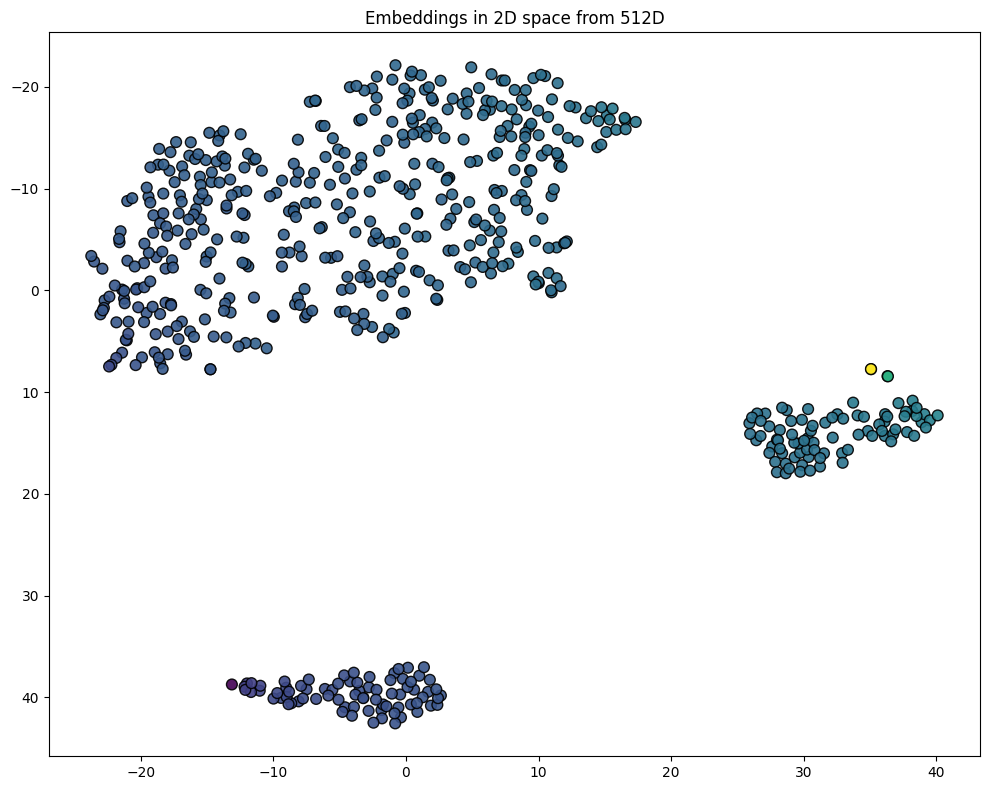

In [5]:
from bioneuralnet.metrics import plot_embeddings

# Using our embeddings instance we get the necessary labels for the graph.
node_labels = gnn._prepare_node_labels()
embeddings_array = embeddings.values  

embeddings_plot = plot_embeddings(embeddings_array, node_labels)

## Embedding Interpretation Notes

We projected the 512‑dimensional node embeddings into 2‑D and observed three clear regions plus one broad cloud.
The class buckets (after binning the continuous phenotype into four equal‑frequency groups) contain:

| Bucket | Samples |
| ------ | ------- |
| 0      | 38      |
| 1      | 158     |
| 2      | 141     |
| 3      | 21      |

## Visual observations

- **Upper‑left cloud**

  - Largest and most diffuse region
  - Contains the majority of points
  - Most likely accounting for buckets 1 and 2

- **Right‑hand oval**

  - Compact cluster on the far right
  - Roughly forty points
  - Could be bucket 0 or 3

- **Lower cluster**

  - Compact group far below the main cloud
  -  Also around forty points
  - Could be bucket 0 or 3


### Integrate Embeddings into Omics Data with SubjectRepresentation

- Let use these omics to enrich the representation of the original dataset.

- The `SubjectRepresentation` function takes our previously generated embeddings and our original Omics Dataset and associated Phenotype

- This function will use the embeddings to enrich the orignal dataset. For more details and how this is performed please view our `GNN Embeddings for Multi-Omics` tab.

In [ ]:
from bioneuralnet.downstream_task import SubjectRepresentation

graph_embed = SubjectRepresentation(
    omics_data=merged_omics,
    embeddings=embeddings,
    phenotype_data=phenotype,
    phenotype_col="phenotype",
    tune=True,
)
enhanced_omics = graph_embed.run()

In [20]:
display("Before graph embedding:")
display(merged_omics.head())
display("After graph embedding:")
display(enhanced_omics.head())

'Before graph embedding:'

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Samp_1,22.485701,40.353720,31.025745,20.847206,26.697293,30.205449,23.512005,33.677622,19.430333,30.260153,...,7.551462,5.407878,13.933045,10.287521,10.213316,10.609973,14.554996,10.955650,11.422531,10.862970
Samp_2,37.058850,34.052233,33.487020,23.531461,26.754628,31.735945,22.795952,29.301536,14.936397,30.823015,...,6.862413,7.309226,13.586180,11.975544,11.496937,10.653742,14.414225,11.811004,12.413667,10.719110
Samp_3,20.530767,31.669623,35.189567,20.952544,25.018826,32.157235,25.069464,22.853719,18.220225,23.092805,...,6.874958,7.754733,13.847029,12.424403,10.930177,10.255484,13.570352,11.311925,11.072915,11.418794
Samp_4,33.186888,38.480880,18.897097,31.823300,34.049383,38.799887,24.106468,12.397175,13.724255,27.703085,...,9.615623,6.693593,13.840728,12.245466,10.836894,11.502232,15.483399,10.812811,10.121957,11.039089
Samp_5,28.961981,41.060494,28.494956,18.374495,30.815238,24.004535,29.616296,24.364045,11.409338,33.599828,...,9.146865,8.104206,13.903452,11.423350,9.997107,10.744586,14.465583,11.730166,12.206151,10.724849


'After graph embedding:'

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Mir_91,Mir_92,Mir_93,Mir_94,Mir_95,Mir_96,Mir_97,Mir_98,Mir_99,Mir_100
Samp_1,47.351359,110.807678,-20.252198,-11.352853,-21.518286,52.715821,-32.940358,-79.971702,4.307760,81.454875,...,-17.795733,-12.500414,16.528918,17.119535,-8.968622,-26.438139,30.388110,-21.472343,0.987792,-8.266013
Samp_2,78.040123,93.504362,-21.858806,-12.814629,-21.564498,55.386906,-31.937167,-69.580142,3.311442,82.969999,...,-16.171923,-16.895417,16.117428,19.928586,-10.095808,-26.547203,30.094207,-23.148779,1.073502,-8.156545
Samp_3,43.234573,86.961929,-22.970151,-11.410217,-20.165424,56.122159,-35.122360,-54.268999,4.039476,62.161666,...,-16.201486,-17.925215,16.426876,20.675535,-9.598119,-25.554816,28.332357,-22.170618,0.957558,-8.688959
Samp_4,69.886378,105.665028,-12.335167,-17.330151,-27.444144,67.715195,-33.773202,-29.438635,3.042706,74.571709,...,-22.660122,-15.472368,16.419401,20.377763,-9.516204,-28.661488,32.326442,-21.192388,0.875321,-8.400028
Samp_5,60.989387,112.748415,-18.600213,-10.006277,-24.837390,41.893725,-41.492480,-57.855456,2.529483,90.444680,...,-21.555451,-18.733027,16.493812,19.009675,-8.778762,-26.773572,30.201432,-22.990341,1.055557,-8.160912


## Disease Classification with DPMON (Disease Prediction using Multi-Omics Networks)

DPMON extends BioNeuralNet’s embedding pipeline for disease classification tasks. Unlike standard node-level GNN objectives (e.g., regression on network properties), DPMON:

- Combines node embeddings with patient-level omics data, capturing both local and global biological signals.
- Uses a classification head (e.g., a softmax layer with cross-entropy loss) to predict discrete disease classes.
- Enables end-to-end training, leveraging GNN-extracted structure and omics context for sample-level prediction.

In this example, we convert the continuous phenotype into 4 discrete classes (0–3) to train a multi-class classifier.

In [7]:
from bioneuralnet.datasets import DatasetLoader
import numpy as np

Example = DatasetLoader("example1")
omics1 = Example.data["X1"]
omics2 = Example.data["X2"]
phenotype = Example.data["Y"]
clinical = Example.data["clinical_data"]

min_val = phenotype["phenotype"].min()
max_val = phenotype["phenotype"].max()

# linspace creates an array of evenly spaced values
bins = np.linspace(min_val, max_val, 5)

phenotype["phenotype"] = pd.cut(phenotype["phenotype"], bins=bins, labels=[0, 1, 2, 3], include_lowest=True)
count_values = phenotype["phenotype"].value_counts(sort=False)

In [8]:
# After binning
display(phenotype)
display(count_values)

,phenotype
Samp_1,1
Samp_2,2
Samp_3,1
Samp_4,3
Samp_5,2
...,...
Samp_354,1
Samp_355,1
Samp_356,2
Samp_357,1


phenotype
0     38
1    158
2    141
3     21
Name: count, dtype: int64

## DPMON Example

In this example, we run **DPMON** in a loop for 3 runs to evaluate its classification performance.

For each run:
- We instantiate a new `DPMON` model with the same inputs: omics data, phenotype, clinical data, and global network.
- Set repeat_num = 3, which instructs DPMON to perform three internal iterations. In each iteration it trains an independent model
- We call `.run()` to generate predictions.
- We extract the predicted and actual labels.
- We compute three classification metrics:
  - **Accuracy**
  - **F1-Weighted**
  - **F1-Macro**

After the 3 runs are complete, we calculate the **mean** and **standard deviation** of each metric. These summary statistics allow us to compare DPMON's performance fairly against other models like Random Forest, using consistent metrics and repeated evaluation.

This setup mimics the structure used for other models in the framework, ensuring that DPMON is evaluated in a reproducible and statistically robust way.


In [ ]:
from bioneuralnet.downstream_task import DPMON
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

acc_scores = []
f1w_scores = []
f1m_scores = []

for i in range(3):
    print(f"DPMON run {i+1}")
    
    dpmon = DPMON(
        adjacency_matrix=global_network,
        omics_list=[omics1, omics2],
        phenotype_data=phenotype,
        clinical_data=clinical,
        repeat_num=3,
        tune=True,
        gpu=True,
        cuda=0,
        output_dir="dpmon_output"
    )
    
    predictions_df = dpmon.run()
    y_true = predictions_df[0]["Actual"]
    y_pred = predictions_df[0]["Predicted"]

    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    f1m = f1_score(y_true, y_pred, average="macro")

    acc_scores.append(acc)
    f1w_scores.append(f1w)
    f1m_scores.append(f1m)

# get the mean and std in tuple form
dpmon_acc_tuple = (np.mean(acc_scores), np.std(acc_scores))
dpmon_f1w_tuple = (np.mean(f1w_scores), np.std(f1w_scores))
dpmon_f1m_tuple = (np.mean(f1m_scores), np.std(f1m_scores))

## Visualizing Results

We now visualize the performance of DPMON compared to a baseline Random Forest using raw omics data.

The metrics shown include:
- **Accuracy**
- **F1-Weighted**
- **F1-Macro**

Each bar represents the mean score across runs, with error bars indicating the standard deviation.

Below, we construct a metrics dictionary and call `plot_multiple_metrics()` to generate the comparison plots.


2025-05-23 10:47:32,429 - bioneuralnet.metrics.plot - INFO - Plotting multiple metrics: ['Accuracy', 'F1-Weighted', 'F1-Macro']


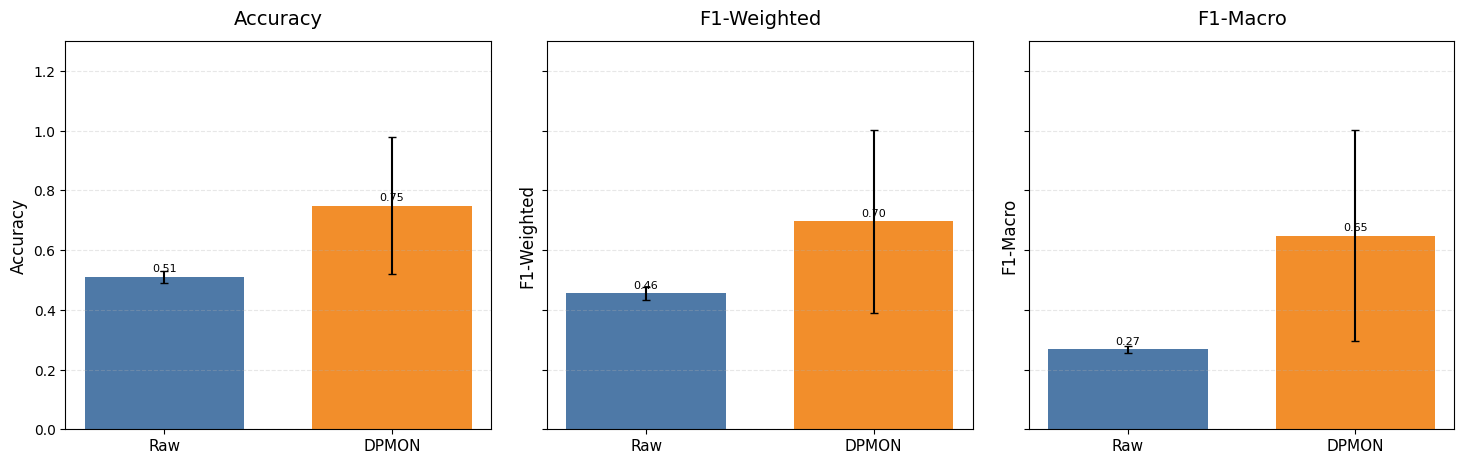

In [10]:
from bioneuralnet.metrics import evaluate_rf, plot_multiple_metrics

# raw omics evaluation
X_raw = merged_omics.values
y_global = phenotype.values
rf_acc, rd_f1w, rf_f1m = evaluate_rf(X_raw, y_global, n_estimators=100, runs=5, mode="classification")

# metrics dictionary
metrics = {
    "Accuracy": {"Raw": rf_acc,"DPMON": dpmon_acc_tuple},
    "F1-Weighted": {"Raw": rd_f1w,"DPMON": dpmon_f1w_tuple},
    "F1-Macro": {"Raw": rf_f1m, "DPMON": dpmon_f1m_tuple}
}

plot_multiple_metrics(metrics)

### Clustering with CorrelatedLouvain and HybridLouvain

- BioNeuralNet includes internal modules for performing correlated clustering on complex networks. 

- These methods modify and extend the traditional community detection by integrating phenotype correlation, allowing users to extract biologically relevant, phenotype-associated modules from any network. 

- For more details on how this performed, please visit our `Correlated Clustering Methods` tab

In [11]:
from bioneuralnet.clustering import  HybridLouvain
import networkx as nx

merged_omics = pd.concat([omics1, omics2], axis=1)
G_network = nx.from_pandas_adjacency(global_network)

hybrid = HybridLouvain(
    G=G_network,
    B=merged_omics,
    Y=phenotype,
    tune=True,
)
hybrid_result = hybrid.run(as_dfs=True)
display("Number of clusters:", len(hybrid_result))

2025-05-23 10:47:32,549 - bioneuralnet.clustering.hybrid_louvain - INFO - Initializing HybridLouvain...
2025-05-23 10:47:32,550 - bioneuralnet.clustering.hybrid_louvain - INFO - Initialized HybridLouvain with 600 graph nodes, 600 omics columns, 358 phenotype rows; max_iter=3, k3=0.2, k4=0.8, tune=True
2025-05-23 10:47:32,551 - bioneuralnet.clustering.hybrid_louvain - INFO - 
Iteration 1/3: Running Correlated Louvain...
2025-05-23 10:47:32,551 - bioneuralnet.clustering.hybrid_louvain - INFO - Tuning Correlated Louvain for current iteration...
2025-05-23 10:47:32,561 - bioneuralnet.clustering.correlated_louvain - INFO - Initialized CorrelatedLouvain with k3 = 0.2, k4 = 0.8, 
2025-05-23 10:47:32,561 - bioneuralnet.clustering.correlated_louvain - INFO - Original omics data shape: (358, 600)
2025-05-23 10:47:32,561 - bioneuralnet.clustering.correlated_louvain - INFO - Original graph has 600 nodes.
2025-05-23 10:47:32,561 - bioneuralnet.clustering.correlated_louvain - INFO - Final omics data

'Number of clusters:'

2

         phenotype
Samp_1           1
Samp_2           2
Samp_3           1
Samp_4           3
Samp_5           2
...            ...
Samp_354         1
Samp_355         1
Samp_356         2
Samp_357         1
Samp_358         1

[358 rows x 1 columns]


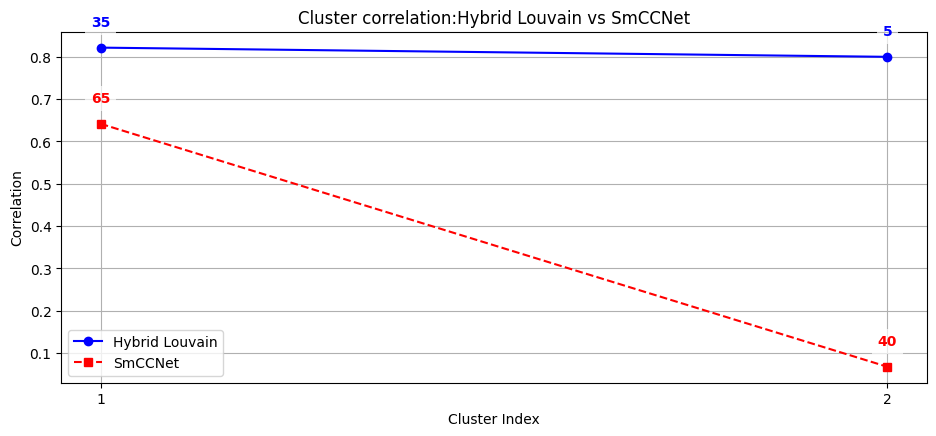

,Cluster,Louvain Size,Louvain Correlation,SMCCNET Size,SMCCNET Correlation
0,Cluster_1,35,0.821929,65,0.641804
1,Cluster_2,5,0.800173,40,0.067307


In [13]:
# Lets compare hytbrid louvain with the SmCCNet clusters
import matplotlib.pyplot as plt

print(phenotype)

compare_clusters(hybrid_result, clusters, phenotype, merged_omics)

### Lets plot the clustered network from correlated louvain

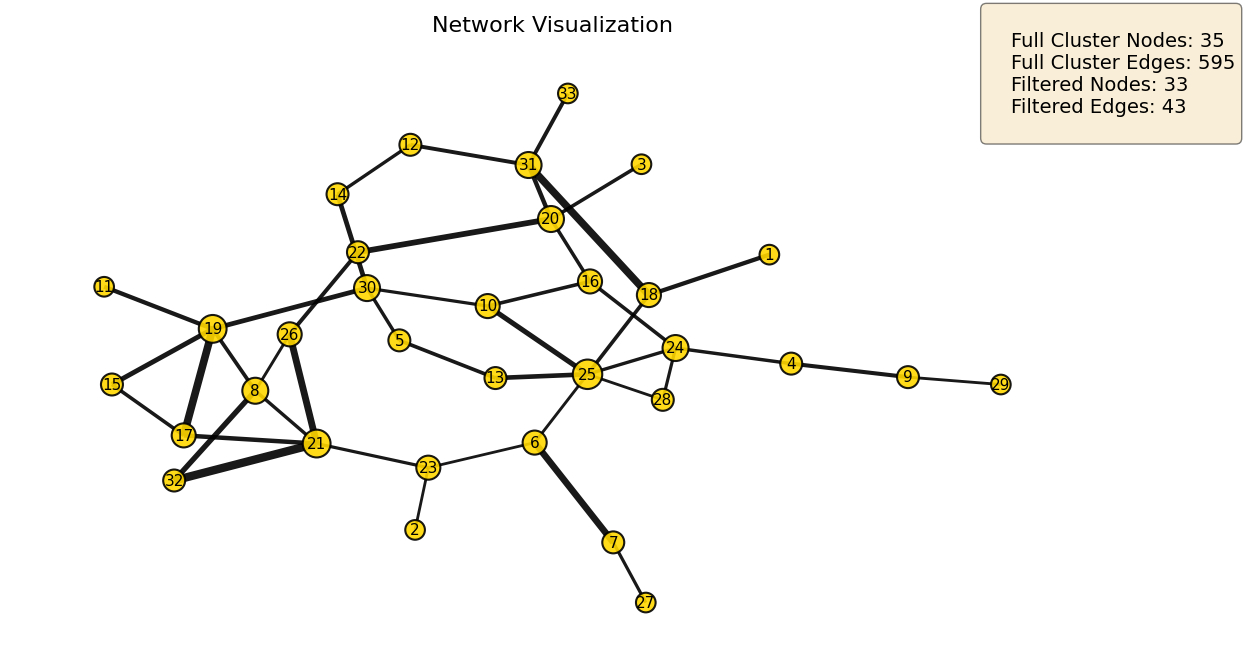

,Omic,Degree
Index,,
25,Gene_411,6
21,Gene_7,5
19,Gene_174,5
20,Gene_1,4
8,Gene_142,4


In [ ]:
from bioneuralnet.metrics import plot_network
from bioneuralnet.metrics import louvain_to_adjacency

cluster1 = hybrid_result[0]
cluster2 = hybrid_result[1]

# Convert Louvain clusters into adjacency matrices
louvain_adj1 = louvain_to_adjacency(cluster1)
louvain_adj2 = louvain_to_adjacency(cluster2)

# Plot using the converted adjacency matrices

cluster1_mapping = plot_network(louvain_adj1, weight_threshold=0.1, show_labels=True, show_edge_weights=False)
display(cluster1_mapping.head())


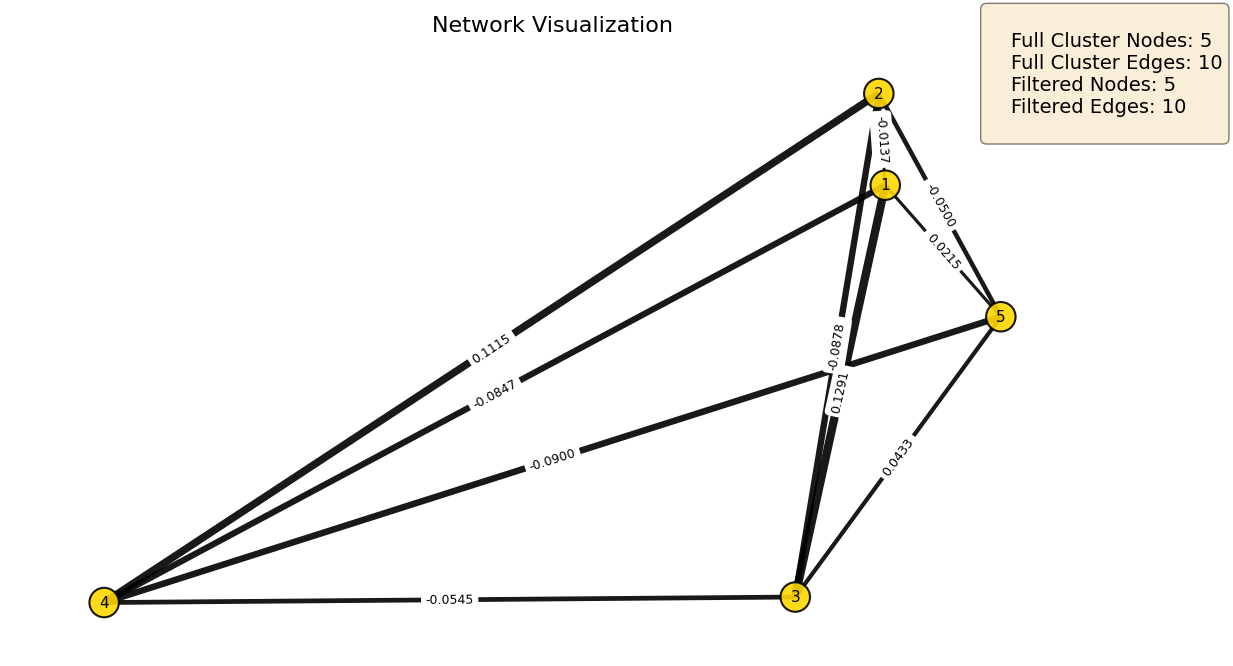

,Omic,Degree
Index,,
1,Gene_7,4
2,Gene_446,4
3,Gene_6,4
4,Gene_53,4
5,Gene_1,4


In [19]:
cluster2_mapping = plot_network(louvain_adj2, weight_threshold=0.01, show_labels=True, show_edge_weights=True)
display(cluster2_mapping.head())

#### Package Version

In [ ]:
import bioneuralnet
print("BioNeuralNet version:", bioneuralnet.__version__)

BioNeuralNet version: 1.0.7
